In [1]:
%load_ext autoreload
%autoreload 2

from datasets import DataToy
from models import MultiLayerNet
from optimers import OptimerSGD, OptimerMoment, OptimerNesMom, OptimerRMSProp, OptimerAdam
from tuners import ParamTuner
from utils import check_accuracy, check_gradient
from utils import show_weight_traces, show_training_infos

In [2]:
# load data
dataloader = DataToy(norm_dis_mean=True, norm_div_std=False,
                     num_val=1000, num_train=4000, num_test=1000)
dataloader.show_info()

Training data shape:  (4000, 1)
Training labels shape:  (4000,)
Validating data shape:  (1000, 1)
Validating labels shape:  (1000,)
Testing data shape:  (1000, 1)
Testing labels shape:  (1000,)


In [3]:
def get_init_model(hyperparams):
    return MultiLayerNet(1, 2, hyperparams=hyperparams, seed=22)

# init model
model = get_init_model({'reg': 0.1, 'nums_hidden': [30, 10], 'loss_type': 'softmax'})

# sanity check
loss = model.backward(dataloader.x_train, dataloader.y_train)
print('Sanity check result:')
print('Init loss is', loss)

# gradient check
print('\nGradient check result:')
check_gradient(model, dataloader.x_train, dataloader.y_train)

Sanity check result:
Init loss is 4.934442962133666 

Gradient check result:
Layer | Key | Numerical gradient | Calculated gradient | Relative error
0 W -0.2113028307881848 -0.21130283097638583 -8.906697430475431e-10
0 b 0.0449983357242445 0.04500303441167633 -0.00010441368669688268
2 W 0.02010736777080524 0.02010736749041658 1.3944573220995113e-08
2 b -0.17267617646865574 -0.17267617644826086 1.181105619048583e-10
4 W 0.19979405152525942 0.19979405176501144 -1.1999958047569876e-09
4 b -0.34618362665383984 -0.3461836266790979 -7.296149056442326e-11


In [6]:
# train model
param_model = {'reg': 0.1, 'nums_hidden': [30, 10], 'loss_type': 'softmax'}
param_optim = {'learn_rate': 1e-1, 'learn_rate_decay': 0.90, 'num_iters': 200, 'batch_size': 200}

model_sgd = get_init_model(param_model)
optimer_sgd = OptimerSGD(hyperparams=param_optim)
optimer_sgd.train(model_sgd, dataloader)

model_mom = get_init_model(param_model)
optimer_mom = OptimerMoment(hyperparams=param_optim)
optimer_mom.train(model_mom, dataloader)

model_nesmom = get_init_model(param_model)
optimer_nesmom = OptimerNesMom(hyperparams=param_optim)
optimer_nesmom.train(model_nesmom, dataloader)

model_rmsprop = get_init_model(param_model)
optimer_rmsprop = OptimerRMSProp(hyperparams=param_optim)
optimer_rmsprop.train(model_rmsprop, dataloader)

model_adam = get_init_model(param_model)
optimer_adam = OptimerAdam(hyperparams=param_optim)
optimer_adam.train(model_adam, dataloader)


0 / 200 loss is 4.970962033866137
100 / 200 loss is 1.4798711297526768
0 / 200 loss is 4.970962033866137
100 / 200 loss is 0.5638461652241155
0 / 200 loss is 4.970962033866137
100 / 200 loss is 0.5646036592746372
0 / 200 loss is 4.970962033866137
100 / 200 loss is 5.607140692236074
0 / 200 loss is 4.970962033866137
100 / 200 loss is 0.5657291714171179


In [7]:
acc_sgd = check_accuracy(model_sgd.predict(dataloader.x_test), dataloader.y_test)
acc_mom = check_accuracy(model_mom.predict(dataloader.x_test), dataloader.y_test)
acc_nesmom = check_accuracy(model_nesmom.predict(dataloader.x_test), dataloader.y_test)
acc_rmsprop = check_accuracy(model_rmsprop.predict(dataloader.x_test), dataloader.y_test)
acc_adam = check_accuracy(model_adam.predict(dataloader.x_test), dataloader.y_test)

print('Accuracy for SGD:', acc_sgd)
print('Accuracy for Momentum:', acc_mom)
print('Accuracy for Nesterov Momentum:', acc_nesmom)
print('Accuracy for RMSProp:', acc_rmsprop)
print('Accuracy for Adam:', acc_adam)


Accuracy for SGD: 0.686
Accuracy for Momentum: 0.686
Accuracy for Nesterov Momentum: 0.686
Accuracy for RMSProp: 0.686
Accuracy for Adam: 0.686


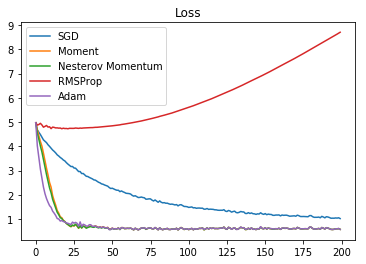

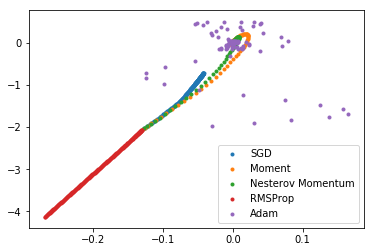

In [8]:
# plot loss curve
show_training_infos([optimer_sgd, optimer_mom, optimer_nesmom, optimer_rmsprop, optimer_adam], 
                    legends=['SGD', 'Moment', 'Nesterov Momentum', 'RMSProp', 'Adam'])

# plot weight trace
show_weight_traces([optimer_sgd, optimer_mom, optimer_nesmom, optimer_rmsprop, optimer_adam], 
                   legends=['SGD', 'Moment', 'Nesterov Momentum', 'RMSProp', 'Adam'])